In [1]:
# https://scikit-learn.org/stable/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('Height-weight Data.csv') 

In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [6]:
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [7]:
df.Height.head(5)

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [8]:
df['Weight'].head(5)

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [9]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [10]:
df.Height.mean()

69.02441087268797

In [11]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [12]:
df.Height.std()

2.8585833281420983

In [13]:
df.shape

(3501, 2)

In [14]:
row, col = df.shape

In [15]:
row

3501

In [16]:
col

2

In [17]:
df.isnull() .sum()

Height    0
Weight    0
dtype: int64

Visualization

Text(0.5, 1.0, 'Height plot')

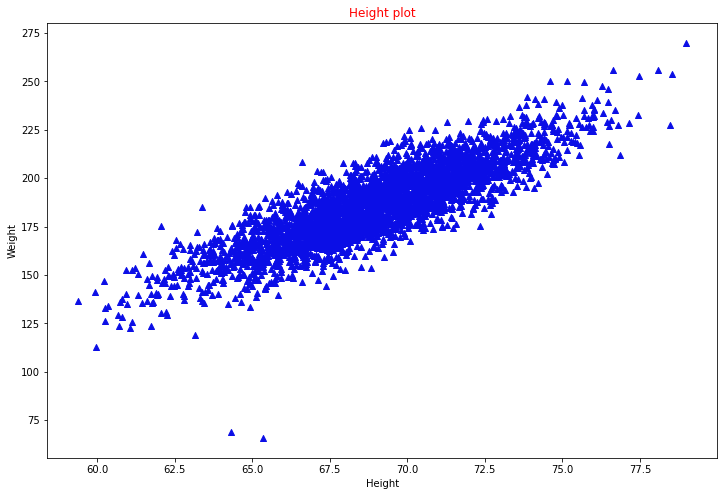

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height , df.Weight, marker="^", color='#0B0EE6') # https://htmlcolorcodes.com/
plt.xlabel('Height', color='black')
plt.ylabel('Weight')
plt.title('Height plot', color='red')

In [19]:
x = df['Height']
y = ['Weight']

In [20]:
x.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [21]:
x = df[['Height']] # x = df.drop('Height', axis=1) ; x = df.drop(columns=('Height'))
y = df['Weight']

In [22]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


Split the dataset into train and test

In [23]:
from sklearn.model_selection import train_test_split as tts

In [24]:
# train 70% ; test =30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size= .30)

In [25]:
xtrain.head()

,Height
678,63.546370
2305,71.170587
1435,74.687093
890,68.929672
2061,67.077931


In [26]:
ytrain.head()

678     150.346658
2305    185.051729
1435    230.136923
890     180.826457
2061    181.526492
Name: Weight, dtype: float64

Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression()

In [29]:
reg.fit(xtrain, ytrain) #training

LinearRegression()

In [30]:
m = reg.coef_
m

array([6.00269855])

In [31]:
c = reg.intercept_
c

-227.49025748292723

In [32]:
x1 = 68.781904
y = m * x1 + c

In [33]:
y

array([185.38677826])

In [34]:
reg.predict([[68.781904]])

C:\Users\Sheela\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([185.38677826])

In [35]:
pred = reg.predict(xtest)

In [36]:
pred

array([169.53464134, 199.91184218, 207.94161837, ..., 170.20143064,
       198.30066135, 207.64329223])

In [37]:
df['predicted result'] = reg.predict(x)

In [38]:
df.head()

,Height,Weight,predicted result
0,73.847017,241.893563,215.791125
1,68.781904,162.310473,185.386779
2,74.110105,212.740856,217.370365
3,71.730978,220.042470,203.089183
4,69.881796,206.349801,191.989098


In [39]:
x1 = 73.847017
y = m * x1 + c
y

array([215.79112475])

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
mse = mean_squared_error(ytest, pred)

In [42]:
mse

99.53600941703895

In [43]:
mae = mean_absolute_error(ytest, pred)

In [44]:
mae

7.9609078061647

Best fit line

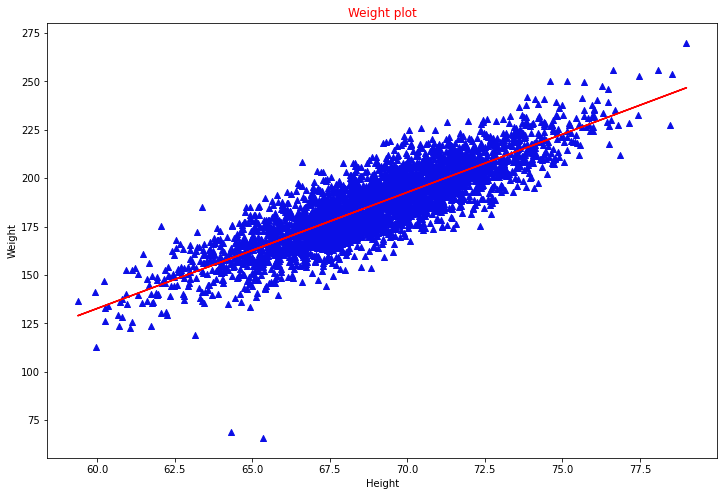

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height , df.Weight, marker='^', color='#0B0EE6')
plt.xlabel('Height', color='black')
plt.ylabel('Weight')
plt.title('Weight plot', color='red')
plt.plot(xtrain.squeeze() , reg.predict(xtrain), color='red')

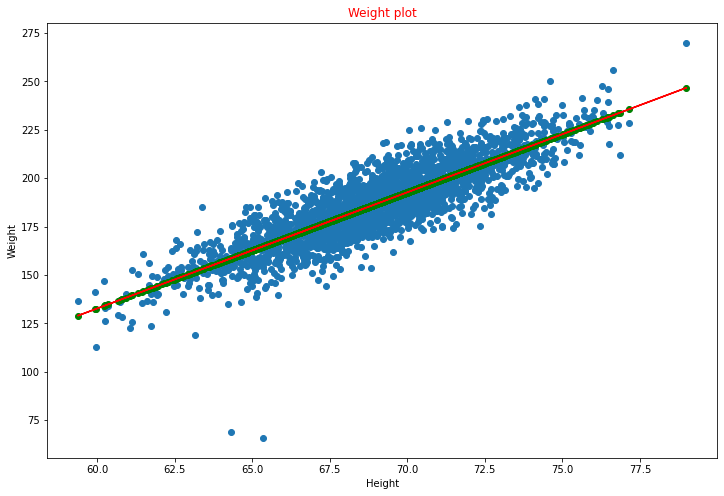

In [46]:
plt.figure(figsize=(12,8))
plt.xlabel('Height', color='black')
plt.ylabel('Weight')
plt.title('Weight plot', color='red')
plt.plot(xtrain.squeeze() , reg.predict(xtrain), color='red')
plt.scatter(xtrain, ytrain)
plt.scatter(xtrain.squeeze() , reg.predict(xtrain), color='green')

In [47]:
import warnings
warnings.filterwarnings('ignore')
reg.predict([[74.110105]])

array([217.3703627])

In [48]:
reg.score(xtest, ytest)

0.7299824534873588

In [49]:
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.7299824534873588